In [15]:
import numpy as np
import pandas as pd

from datetime import datetime

from plotnine import *
theme_set(theme_matplotlib())

In [16]:
hommik = 21_600 / 3600  # hommikune äratus kell 06:00
reservaeg = 60_300 / 3600  # reservaja algus kell 16:45
esimene_päev = 197  # teenistuse esimene päev 17.07.2023

In [17]:
df = pd.read_csv('andmed/spioonid.csv')

df['kuupäev'] = df['kuupäev'].apply(lambda x: datetime.fromisoformat(x))
df['tund'] = df['kuupäev'].apply(lambda x: (x - x.replace(hour=0, minute=0, second=0)).total_seconds() / 3600)
df['päev'] = df['kuupäev'].apply(lambda x: x.timetuple().tm_yday - esimene_päev)
df['päev'] = df.groupby('päev').ngroup()
df['päev_n'] = df.groupby('päev').cumcount()
df['tühemik'] = df.groupby('päev')['tund'].diff().fillna(df['tund'] - hommik)
df['tegevusaeg'] = (df['tund'] >= reservaeg).map({True: 'Vaba- ja reservaeg', False:'Muu aeg'})

df.tail()

,kuupäev,tund,päev,päev_n,tühemik,tegevusaeg
75,2023-08-28 06:22:28,6.374444,25,1,0.001389,Muu aeg
76,2023-08-28 06:25:57,6.432500,25,2,0.058056,Muu aeg
77,2023-08-28 06:26:04,6.434444,25,3,0.001944,Muu aeg
78,2023-08-28 06:57:48,6.963333,25,4,0.528889,Muu aeg
79,2023-08-28 08:05:43,8.095278,25,5,1.131944,Muu aeg


C:\Users\martm\anaconda3\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\martm\anaconda3\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: joonised/punktiprotsessid.png


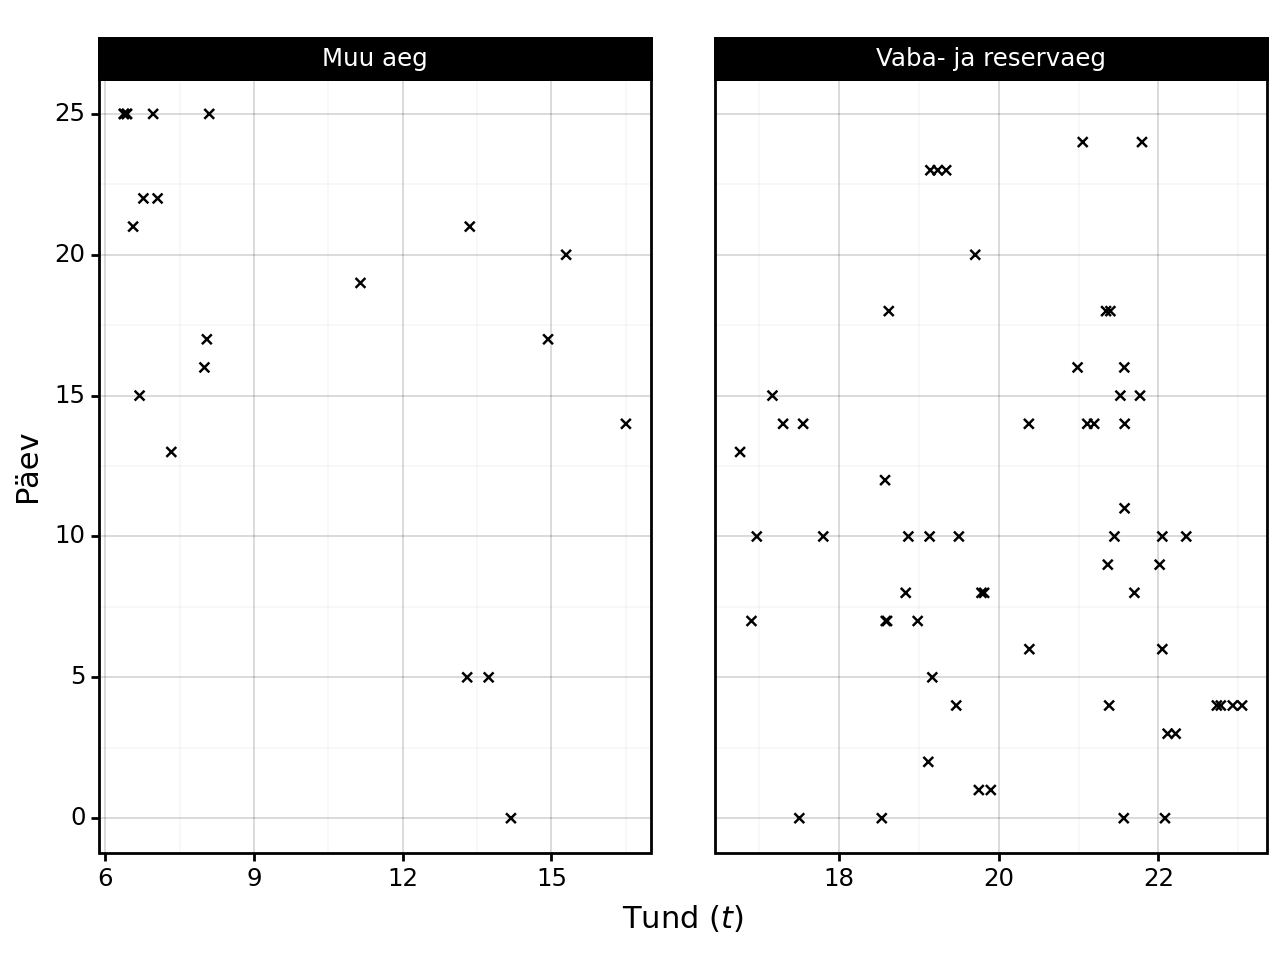

<Figure Size: (640 x 480)>

In [19]:
g = ggplot(df) + facet_wrap('tegevusaeg', scales='free_x') + aes('tund', 'päev')
g += theme_linedraw() + theme(panel_spacing=0.05)
g += labs(x='Tund $(t)$', y='Päev')
g += geom_point(shape='x')

g.save('joonised/punktiprotsessid.png', dpi=100)
g

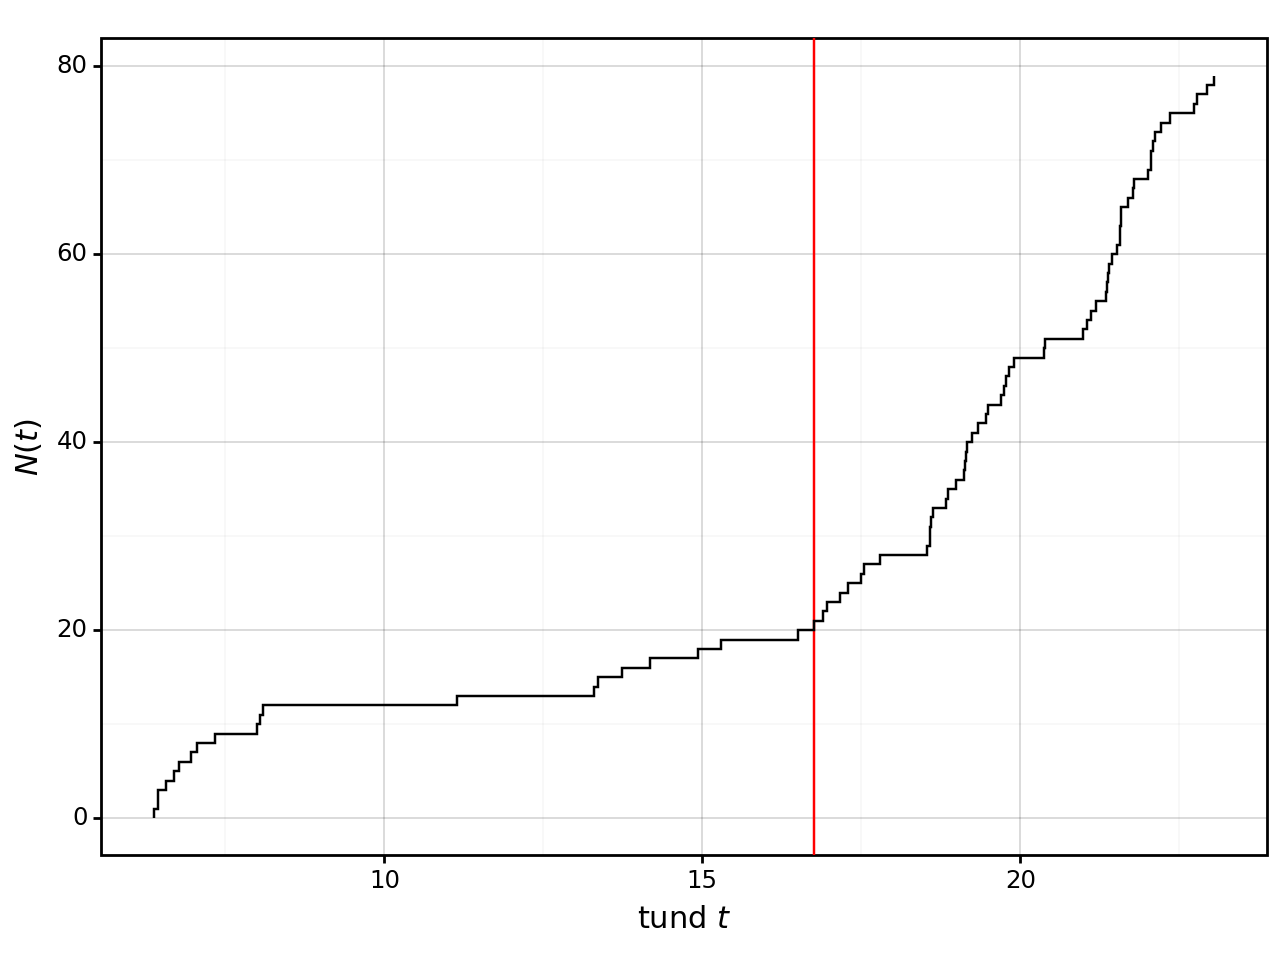

<Figure Size: (640 x 480)>

In [20]:
aste_df = df.sort_values('tund')
aste_df['n'] = np.arange(0, aste_df.shape[0])

g = ggplot(aste_df) + theme_linedraw() + aes('tund', 'n')
g += labs(x='tund $t$', y='$N(t)$')
g += geom_vline(xintercept=reservaeg, color='r')
g += geom_step()

# g.save('paber/spioonid_astmejoonis.png', dpi=100)
g